In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from stfe.gene_utils import get_markers
import scanpy as sc
from plotly3d.plot import trajectories
from sklearn.cluster import KMeans
import pandas as pd
import pathlib
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [3]:
output_dir = '../results_final_Jan15/'
pathlib.Path(output_dir).mkdir(exist_ok=True)

In [4]:
gene_names = adata.var_names.to_numpy()

In [14]:
traj = np.load(f"../results_final_Dec22/traj_gene_space_T_extreme.npy", allow_pickle=True)

# sc.pp.highly_variable_genes(adata, n_top_genes=400)
alex_genes = open('../data/hvg.txt').read().splitlines()
alex_tfs = open('../data/hv_tf.txt').read().splitlines()

alex_gene_all = list(set(alex_genes) | set(alex_tfs))
alex_gene_all_mask = np.isin(adata.var_names, alex_gene_all)
traj = traj[:, :, alex_gene_all_mask]
gene_names = adata.var_names[alex_gene_all_mask]

In [15]:
traj_mean = traj.mean(axis=1)
traj_std = traj.std(axis=1)
traj_mean_std = traj_mean.std(axis=0)
zero_std_genes = traj_mean_std == 0
gene_names = np.array(gene_names)[~zero_std_genes]
traj, traj_mean, traj_std, traj_mean_std = traj[..., ~zero_std_genes], traj_mean[..., ~zero_std_genes], traj_std[..., ~zero_std_genes], traj_mean_std[..., ~zero_std_genes]
# traj_mean_normalized = (traj_mean - traj_mean.mean(axis=0)) / traj_mean.std(axis=0)
traj_mean_normalized = (traj_mean - traj_mean.min(axis=0)) / (traj_mean.max(axis=0) - traj_mean.min(axis=0))

In [16]:
trends_df = pd.DataFrame(traj_mean_normalized, columns=gene_names, index=[f't{i}' for i in range(traj_mean_normalized.shape[0])]).T


In [17]:
# Get the indices of top 5 values for each row
top_5_indices = trends_df.apply(lambda x: np.where(x >= sorted(x)[-10])[0].mean(), axis=1)
# Sort the dataframe by mean of top 5 indices
trends_df_sorted = trends_df.iloc[top_5_indices.argsort()]
trends_df_sorted

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99
PCOLCE-AS1,1.000000,0.978490,0.958264,0.939581,0.919392,0.897787,0.873780,0.849521,0.824156,0.796242,...,0.196899,0.198037,0.199629,0.202337,0.205444,0.208901,0.216619,0.226009,0.239387,0.252272
COL3A1,1.000000,0.977467,0.958028,0.940676,0.921419,0.900268,0.875813,0.849860,0.822492,0.791026,...,0.110509,0.122422,0.137155,0.155452,0.179249,0.210965,0.256092,0.307613,0.369118,0.432162
WNT16,1.000000,0.984071,0.969195,0.955099,0.938815,0.920014,0.897709,0.874259,0.848673,0.819070,...,0.100632,0.108015,0.113552,0.119744,0.125217,0.131583,0.142650,0.155642,0.173615,0.191933
CPA4,1.000000,0.993172,0.987817,0.982227,0.973843,0.962457,0.947736,0.931912,0.910868,0.886960,...,0.123515,0.121988,0.119056,0.114650,0.106665,0.091414,0.074200,0.054322,0.036554,0.020391
MEST,0.999442,0.999990,1.000000,0.998516,0.993602,0.984986,0.971787,0.954375,0.929101,0.897519,...,0.114250,0.108895,0.098035,0.085503,0.070089,0.053694,0.039206,0.025067,0.011882,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KCNJ6,0.126533,0.113007,0.099475,0.086371,0.074774,0.064475,0.055247,0.048545,0.044346,0.042664,...,0.855736,0.872249,0.889399,0.909511,0.930831,0.952299,0.969901,0.985225,0.994650,1.000000
AL354822.1,0.859877,0.835256,0.811888,0.790748,0.769628,0.748697,0.725162,0.700286,0.671170,0.639411,...,0.865767,0.887798,0.907969,0.928172,0.947105,0.968851,0.987555,1.000000,0.998078,0.988119
MIR34AHG,0.603982,0.580609,0.558729,0.539284,0.521852,0.506618,0.492377,0.481792,0.474933,0.469277,...,0.847649,0.856113,0.866056,0.880146,0.898377,0.919171,0.940054,0.961944,0.982470,1.000000
PDPN,0.032912,0.035323,0.036270,0.035839,0.035408,0.034850,0.033722,0.031417,0.027078,0.021606,...,0.877547,0.896335,0.915368,0.935200,0.953609,0.970277,0.983757,0.994338,0.998718,1.000000


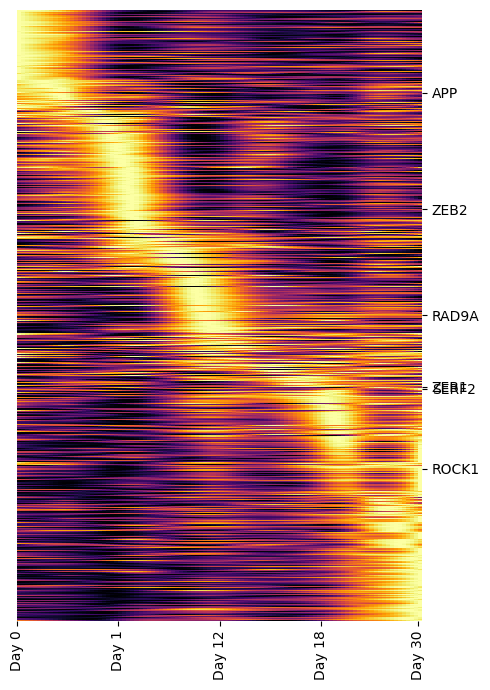

In [18]:
plt.figure(figsize=(5, 7))
# Create heatmap with selected y-ticks
ytick_genes = ['ROCK1', 'APP', 'RAD9A', 'SERF2', 'ZEB1', 'ZEB2', 'TWIST1', 'TWIST2', 'SNAI1', 'SNAI2', 'EPCAM']
# ytick_genes = ['ESRRA', 'ZEB1', 'ARNT', 'SNAI1', 'SNAI2', 'ATF3']
# ytick_genes = ['ROCK1', 'APP', 'RAD9A', 'SERF2', 'RPL6']
ytick_positions = [trends_df_sorted.index.get_loc(gene) for gene in ytick_genes if gene in trends_df_sorted.index]
ytick_labels = [ytick_genes[i] for i,pos in enumerate(ytick_positions)]

# Create heatmap with y-axis on the right
ax = sns.heatmap(trends_df_sorted, cmap='inferno', vmin=0, vmax=1,
                 cbar=False,
                 yticklabels=False)

# Move y-axis to the right and increase font size
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.yticks(ytick_positions, ytick_labels)

# Customize x-ticks to show days  
days = [0, 1, 12, 18, 30]
tick_positions = [0, 25, 50, 75, 99]  # Evenly spaced positions
plt.xticks(tick_positions, [f'Day {d}' for d in days])

plt.tight_layout()

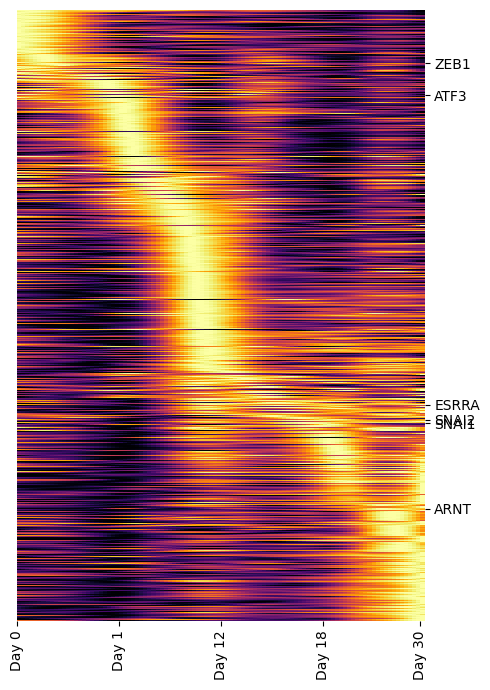

In [19]:
traj = np.load(f"../results_final_Dec22/traj_gene_space_T_extreme.npy", allow_pickle=True)

# sc.pp.highly_variable_genes(adata, n_top_genes=400)
# alex_genes = open('../data/alex_genes.txt').read().splitlines()
# alex_tfs = open('../data/alex_tfs.txt').read().splitlines()

# alex_gene_all = list(set(alex_genes) | set(alex_tfs))
# alex_gene_all_mask = np.isin(adata.var_names, alex_gene_all)
# traj = traj[:, :, alex_gene_all_mask]
gene_names = adata.var_names

traj_mean = traj.mean(axis=1)
traj_std = traj.std(axis=1)
traj_mean_std = traj_mean.std(axis=0)
zero_std_genes = traj_mean_std == 0
gene_names = np.array(gene_names)[~zero_std_genes]
traj, traj_mean, traj_std, traj_mean_std = traj[..., ~zero_std_genes], traj_mean[..., ~zero_std_genes], traj_std[..., ~zero_std_genes], traj_mean_std[..., ~zero_std_genes]
# traj_mean_normalized = (traj_mean - traj_mean.mean(axis=0)) / traj_mean.std(axis=0)
traj_mean_normalized = (traj_mean - traj_mean.min(axis=0)) / (traj_mean.max(axis=0) - traj_mean.min(axis=0))

trends_df = pd.DataFrame(traj_mean_normalized, columns=gene_names, index=[f't{i}' for i in range(traj_mean_normalized.shape[0])]).T

# Get the indices of top 5 values for each row
top_5_indices = trends_df.apply(lambda x: np.where(x >= sorted(x)[-10])[0].mean(), axis=1)
# Sort the dataframe by mean of top 5 indices
trends_df_sorted = trends_df.iloc[top_5_indices.argsort()]

plt.figure(figsize=(5, 7))
# Create heatmap with selected y-ticks
# ytick_genes = ['ROCK1', 'APP', 'RAD9A', 'SERF2', 'ZEB1', 'ZEB2', 'TWIST1', 'TWIST2', 'SNAI1', 'SNAI2', 'EPCAM']
# ytick_genes = ['ROCK1', 'APP', 'RAD9A', 'SERF2', 'RPL6']
ytick_genes = ['ESRRA', 'ZEB1', 'ARNT', 'SNAI1', 'SNAI2', 'ATF3']
ytick_positions = [trends_df_sorted.index.get_loc(gene) for gene in ytick_genes if gene in trends_df_sorted.index]
ytick_labels = [ytick_genes[i] for i,pos in enumerate(ytick_positions)]

# Create heatmap with y-axis on the right
ax = sns.heatmap(trends_df_sorted, cmap='inferno', vmin=0, vmax=1,
                 cbar=False,
                 yticklabels=False)

# Move y-axis to the right and increase font size
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.yticks(ytick_positions, ytick_labels)

# Customize x-ticks to show days  
days = [0, 1, 12, 18, 30]
tick_positions = [0, 25, 50, 75, 99]  # Evenly spaced positions
plt.xticks(tick_positions, [f'Day {d}' for d in days])

plt.tight_layout()

plt.savefig(f'{output_dir}/heatmap_extreme_T_hvg.png', bbox_inches='tight', pad_inches=0.1)


<Axes: >

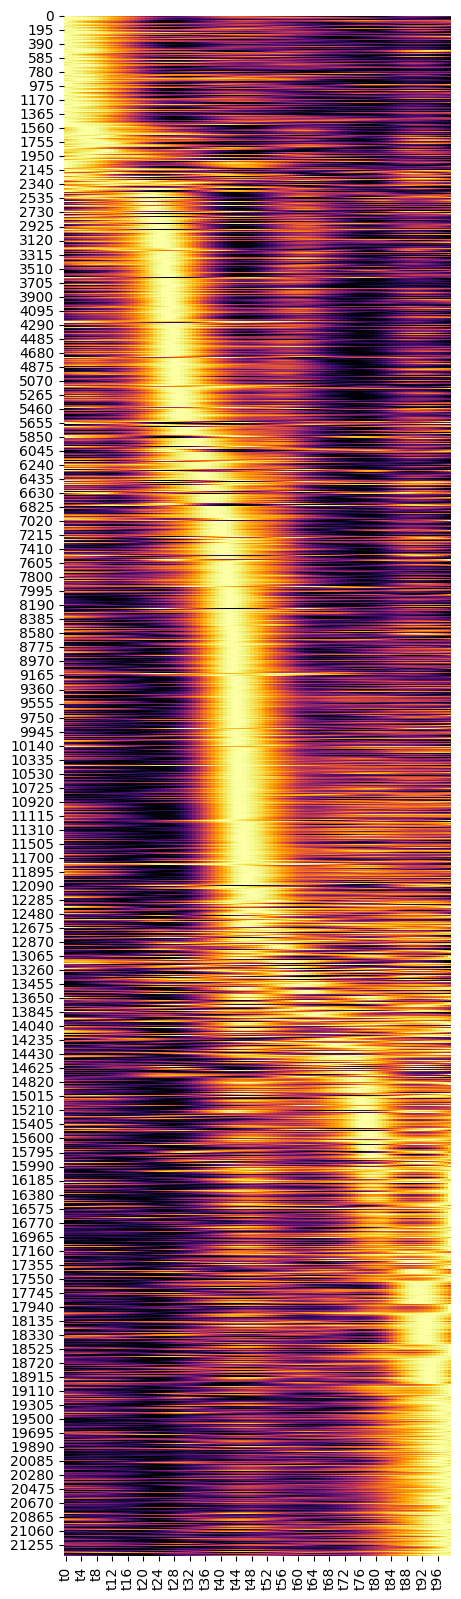

In [20]:
trends_df_sorted_numerical_index = trends_df_sorted.reset_index(drop=True)
plt.figure(figsize=(5, 20))
sns.heatmap(trends_df_sorted_numerical_index, cmap='inferno', vmin=0, vmax=1,
                 cbar=False)

In [22]:
# assert False
# Split indices into 5 groups using the cluster points
cluster_pts = [2340, 6045, 12675, 17160]
cluster_groups = [
    trends_df_sorted.index[:cluster_pts[0]].tolist(),
    trends_df_sorted.index[cluster_pts[0]:cluster_pts[1]].tolist(),
    trends_df_sorted.index[cluster_pts[1]:cluster_pts[2]].tolist(), 
    trends_df_sorted.index[cluster_pts[2]:cluster_pts[3]].tolist(),
    trends_df_sorted.index[cluster_pts[3]:].tolist()
]

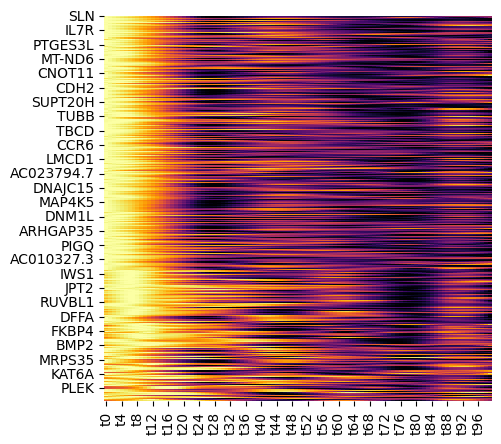

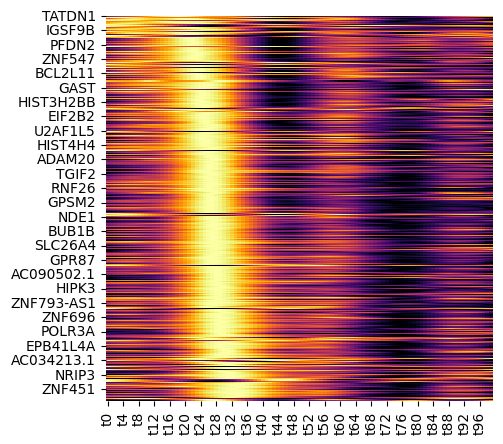

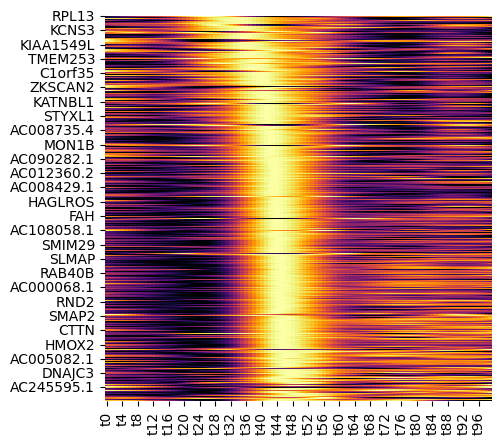

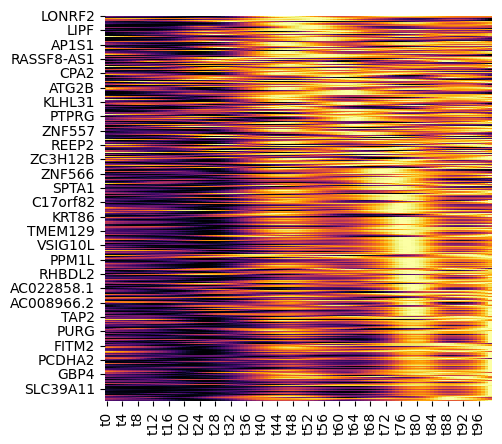

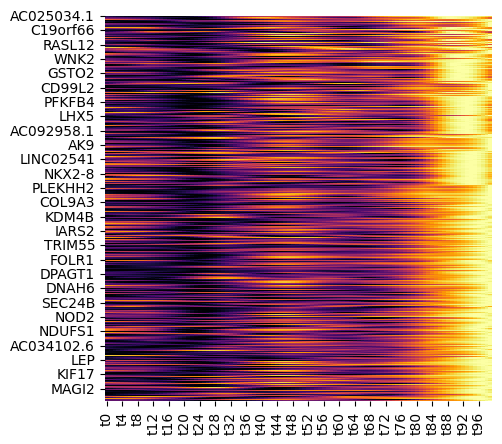

In [23]:
for trend_subset in cluster_groups:
    plt.figure(figsize=(5, 5))
    to_plot = trends_df_sorted.loc[trend_subset, :]
    sns.heatmap(to_plot, cmap='inferno', vmin=0, vmax=1,
                 cbar=False)

<Axes: >

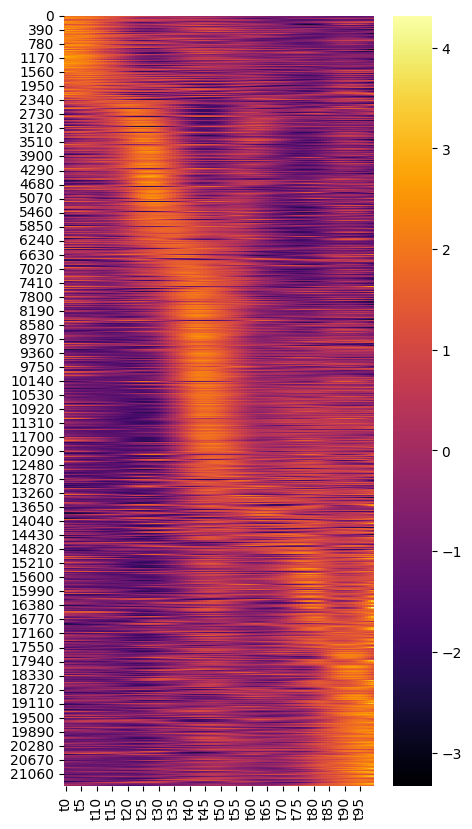

In [39]:
traj_mean_whiten = (traj_mean - traj_mean.mean(axis=0)) / traj_mean.std(axis=0)
trends_df_whiten = pd.DataFrame(traj_mean_whiten, columns=gene_names, index=[f't{i}' for i in range(traj_mean_whiten.shape[0])]).T

# Get the indices of top 5 values for each row
top_5_indices = trends_df_whiten.apply(lambda x: np.where(x >= sorted(x)[-10])[0].mean(), axis=1)
# Sort the dataframe by mean of top 5 indices
trends_df_whiten_sorted = trends_df_whiten.iloc[top_5_indices.argsort()]
trends_df_whiten_sorted

trends_df_whiten_sorted_numerical_index = trends_df_whiten_sorted.reset_index(drop=True)
plt.figure(figsize=(5, 10))
sns.heatmap(trends_df_whiten_sorted_numerical_index, cmap='inferno',
                 )

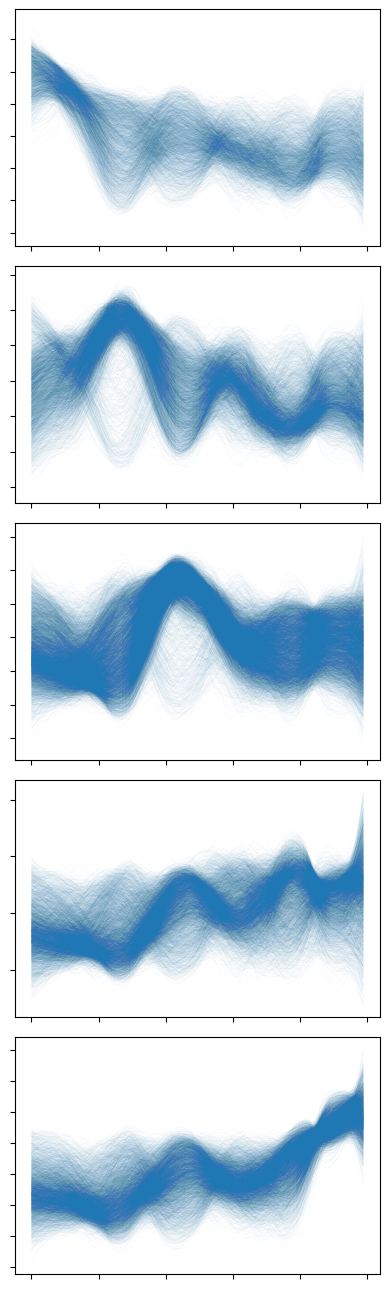

In [47]:
fig, axs = plt.subplots(5, 1, figsize=(4, 13))
for i, trend_subset in enumerate(cluster_groups):
    to_plot = trends_df_whiten_sorted.loc[trend_subset, :]
    # make plots using plt plot
    for row in to_plot.iterrows():
        axs[i].plot(row[1].values, color='#1f77b4', linewidth=0.1, alpha=0.1)
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
plt.tight_layout()
plt.savefig(f'{output_dir}/plot_cluster_extreme_T_whiten_hvg.png', bbox_inches='tight', pad_inches=0.1, dpi=300)